### AccelerateAI - Python for Data Science
##### Introduction to Python Language  (Python 3) 
In this notebook we will cover the following: 
* 1. NumPy       <br> 
* 2. Pandas      <br>
* 3. String & Text <br>

We will cover the following in Notebook 2:
* 5. Data Wrangling <br>
* 6. Advanced Numpy          <br>
***

#### 1. Numpy
- Numpy is short for <b>Num</b>erical <b>Py</b>thon
- It is a fundamental package required for high performance scientific computing and data analysis
- Many data analysis libraries are built on top of NumPy
- Here are some of the things it provides:
    - <b>ndarray</b>, a fast and space-efficient multidimensional array providing 
        - fast vectorized array operations for data munging and cleaning
        - common array algorithms like sorting, unique, and set operations 
        - efficient descriptive statistics and aggregating/summarizing data 
        - data alignment and relational data manipulations for merging and joining datasets
        - expressing conditional logic as array expressions instead of loops with if-elifelse branches
        - group-wise data manipulations 
    - tools for reading / writing array data to disk and working with memory-mapped files 
    - linear algebra, random number generation, and Fourier transform capabilities
    - tools for integrating code written in C, C++, and Fortran

##### 1.1.1 Scalars in Numpy
- Python defines only one type of a particular data class (1 integer type, 1 floating-point type, etc.)
- In NumPy, there are 24 new fundamental Python types to describe different types of scalars
        - numpy.generic : Base class for numpy scalar types
        - numpy.ushort, numpy.uint, numpy.ulonglong etc for unsigned integer
        - numpy.half, numpy.single, numpy.double, numpy.longdouble etc : for floating point 
        - numpy.datetime for storing time
        - numpy.str_ for string

In [1]:
#importing numpy
import numpy as np
import pandas as pd

In [2]:
print(np.ScalarType)

(<class 'int'>, <class 'float'>, <class 'complex'>, <class 'int'>, <class 'bool'>, <class 'bytes'>, <class 'str'>, <class 'memoryview'>, <class 'numpy.uint32'>, <class 'numpy.str_'>, <class 'numpy.datetime64'>, <class 'numpy.float32'>, <class 'numpy.bool_'>, <class 'numpy.float64'>, <class 'numpy.clongdouble'>, <class 'numpy.float16'>, <class 'numpy.bytes_'>, <class 'numpy.uint16'>, <class 'numpy.complex64'>, <class 'numpy.complex128'>, <class 'numpy.timedelta64'>, <class 'numpy.int32'>, <class 'numpy.uint8'>, <class 'numpy.longdouble'>, <class 'numpy.void'>, <class 'numpy.int64'>, <class 'numpy.uintc'>, <class 'numpy.object_'>, <class 'numpy.int8'>, <class 'numpy.intc'>, <class 'numpy.uint64'>, <class 'numpy.int16'>)


In [3]:
x = np.int8(1)
y = np.float32(1.0)
x == y                                          #What do you expect the result to be?      

True

In [4]:
print(x.dtype , y.dtype)

int8 float32


In [5]:
#check current version of pandas
print("Pandas Version:", pd.__version__)

Pandas Version: 1.1.5


##### 1.1.2 Numpy Constants - NumPy includes several constants
 - numpy.Inf
 - numpy.nan    (NaN, NAN are aliases)
 - numpy.NINF
 - numpy.PZERO
 - numpy.NZERO
 - numpy.pi
 - numpy.euler_gamma

In [6]:
np.log(0)

C:\Users\sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [7]:
np.NZERO

-0.0

In [8]:
np.pi

3.141592653589793

##### 1.2 Numpy Ndarray creation and reshape

In [1]:
#importing numpy
import numpy as np

In [10]:
#creating array
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1                                        #Note the way it is represented with 2 paranthesis

array([6. , 7.5, 8. , 0. , 1. ])

In [11]:
print("Dimensions:", arr1.ndim)

Dimensions: 1


In [12]:
# Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [13]:
print("Dimensions:", arr2.ndim)
print("Shape:", arr2.shape)

Dimensions: 2
Shape: (2, 4)


In [14]:
# other functions for creating new arrays.
a = np.zeros(10)                                #array will all zero
b = np.ones((3, 6))                             #array with all ones
print("a=", a,"\n","b=",b)

a= [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] 
 b= [[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


In [15]:
np.eye(3)                                       #Identity matrix

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
np.random.rand(3,3)                             # random values

array([[0.28103348, 0.77400794, 0.35485681],
       [0.73103234, 0.92051909, 0.19556655],
       [0.44584139, 0.37754316, 0.61519448]])

In [17]:
arr = np.arange(8)
arr

array([0, 1, 2, 3, 4, 5, 6, 7])

In [18]:
#change the dimension of the array
arr.reshape((4, 2))                               #Note the order of numbers 

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

In [19]:
x = arr.reshape((4,2), order='F')                  #Order C- C language type, F - Fortran type
x

array([[0, 4],
       [1, 5],
       [2, 6],
       [3, 7]])

In [20]:
#chaining 
np.arange(10).reshape((2,5))

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [21]:
#convert from higher dimension to single dimension
x.flatten()                                              #Note the order of numbers

array([0, 4, 1, 5, 2, 6, 3, 7])

##### 1.3 Ndarray attributes

In [3]:
arr = np.arange(9).reshape(3,3, order='F')
arr

array([[0, 3, 6],
       [1, 4, 7],
       [2, 5, 8]])

In [5]:
arr.max()                                                    #max value      min- minimum value

8

In [24]:
arr.argmax(axis=1)                                           # argmax - index of maximum value, similarly argmin

array([2, 2, 2], dtype=int64)

In [25]:
arr.dtype                                                    #data type

dtype('int32')

##### 1.4 Array arithmetic 
 - arithmetic operations applies the operation elementwise

In [26]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr + 10.

array([[11., 12., 13.],
       [14., 15., 16.]])

In [27]:
arr * 2

array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [28]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [29]:
np.sqrt(arr)

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [30]:
np.square(arr)

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [31]:
arr.sum()                                             #total of all elements

21.0

In [32]:
arr.mean()                                            #mean of all elements           

3.5

In [33]:
arr.mean(axis=1)                                      #column means                         

array([2., 5.])

##### 1.5 Array Slicing

In [34]:
#slicing
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
arr[0]                                       #index starts at 0

0

In [36]:
arr[5:8]                                     #slicing within a range

array([5, 6, 7])

In [37]:
#broadcasting 
arr[5:8] = 12                                #slicing creates a view - hence original arr is modified
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [38]:
# Sllicing in higher dimension
arr = np.arange(9).reshape(3,3)
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [39]:
# slicing : row, column
arr[1,2]

5

In [40]:
# slicing : rowstart:rowend-1, columnstart:columnend-1

In [41]:
arr[1:3,1:3]                                # will return a 2 x 2 array

array([[4, 5],
       [7, 8]])

In [42]:
#What would be the output?
arr[1,:3]                                  

array([3, 4, 5])

In [43]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [44]:
arr[[4, 3, 6]]                                #select specified rows

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [6., 6., 6., 6.]])

In [45]:
#Array copy
arr = np.array([11, 12, 13, 14, 15])

x = arr.copy()                                #creates a copy of original array

arr[0] = 42
print(arr)
print(x)                                      # note that X doesn't change

[42 12 13 14 15]
[11 12 13 14 15]


##### 1.6 Transpose, Swapping and Dot product

In [46]:
arr = np.arange(16).reshape(4, 4)
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [47]:
arr.T                                                   #transpose 

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [48]:
arr.swapaxes(1,0)                                       #same as transpose - as there are only 2 axes

array([[ 0,  4,  8, 12],
       [ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15]])

In [49]:
np.dot(arr.T, arr)                                      #dot product

array([[224, 248, 272, 296],
       [248, 276, 304, 332],
       [272, 304, 336, 368],
       [296, 332, 368, 404]])

In [50]:
arr.trace()

30

In [51]:
np.linalg.eig(arr)                                       #eigen values & eigen vectors

(array([ 3.24642492e+01, -2.46424920e+00,  2.51097936e-15, -1.94268697e-16]),
 array([[-0.11417645,  0.7327781 , -0.54460895,  0.0984534 ],
        [-0.3300046 ,  0.28974835,  0.76961357,  0.27032764],
        [-0.54583275, -0.15328139,  0.09459973, -0.83601548],
        [-0.76166089, -0.59631113, -0.31960434,  0.46723444]]))

In [52]:
np.linalg.svd(arr)                                       #singular value decomposition

(array([[-0.09184212, -0.83160389,  0.5476326 , -0.00992624],
        [-0.31812733, -0.44586433, -0.72277822,  0.42141623],
        [-0.54441254, -0.06012478, -0.19734137, -0.81305374],
        [-0.77069775,  0.32561478,  0.37248699,  0.40156375]]),
 array([3.51399637e+01, 2.27661021e+00, 1.24114673e-15, 2.11475159e-17]),
 array([[-0.42334086, -0.47243254, -0.52152422, -0.57061589],
        [ 0.72165263,  0.27714165, -0.16736932, -0.6118803 ],
        [-0.41772807,  0.82102385, -0.38886348, -0.0144323 ],
        [ 0.35426439, -0.1609964 , -0.74080037,  0.54753238]]))

##### 1.7 Numpy Example

In [53]:
sample1 = np.random.normal(100,15,40)
sample2= np.random.normal(125,15,40)

In [54]:
def t_test(x, y):
    diff = y - x
    var = np.var(diff, ddof=1)
    num = np.mean(diff)
    denom = np.sqrt(var / len(x))
    return np.divide(num, denom)

In [55]:
# Null hypothesis : mean(sample1) = mean(sample2)

t_stats = t_test(sample1, sample2)


In [56]:
from scipy import stats
dof = len(sample1) - 1
p_value = 1- stats.distributions.t.cdf(t_stats, dof)

print("The t value is {} and the p value is {}.".format(t_stats, p_value))               

The t value is 10.301506314932094 and the p value is 5.480060849549773e-13.


#### 2. Pandas
- Pandas is a Python package providing fast and flexible data structure
- It is designed to work with structured, relational or labeled (tabular) data 
- It has functions for reading, analyzing, cleaning, exploring(plotting), and manipulating data
- It works very well with large amount of data for indexing, subsetting, slicing, reshaping and merging
- It is also great for working with time series data with functionality for quick filtering and plotting
- The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" 

##### 2.1 Pandas data structures
- Pandas has a few important data structures:
    - Series: 1 dimensional array holding data of any type (like a column in a table)
    - DataFrame: 2 dimensional data structre (a table with rows and columns)
    - Datetime : also an important data structure for working with dates
<br><br>
- Other data structures like pandas array, strings etc are not in common use.
- Panel data a 3 dimesional data structure for storing panel data, is now deprecated and no longer in use.

###### 2.1.1 Pandas Series

In [8]:
#import pandas 
import pandas as pd
import numpy as np

In [58]:
#creating a series from list
a = [1, 7, 2, 5,9]
myseries = pd.Series(a)

print(myseries)                                            #notice the index printed with the values, along with data type

0    1
1    7
2    2
3    5
4    9
dtype: int64


In [59]:
#specifying the index 
myserwithind = pd.Series(a, index = ["a", "b", "c", "b", "e"])
print(myserwithind) 

a    1
b    7
c    2
b    5
e    9
dtype: int64


In [60]:
#creating a series from dictionary
calories = {"day1": 420, "day2": 380, "day3": 390}
mydiet = pd.Series(calories)

print(mydiet)                                                 #where do the keys go? 

day1    420
day2    380
day3    390
dtype: int64


In [9]:
#Naming the series attributes 

fruitprice = {'apples': 200, 'kiwi': 300, 'oranges': 70, 'cherries': 500, 'banana':30, 'guava':55}
mySeries = pd.Series(fruitprice)

mySeries.name = 'March Fruit Prices'                          #name is the sweetest sound for every individual
mySeries.index.name = 'Fruit'

print(mySeries)

Fruit
apples      200
kiwi        300
oranges      70
cherries    500
banana       30
guava        55
Name: March Fruit Prices, dtype: int64


In [62]:
 mySeries.ndim

1

In [63]:
mySeries.size

6

In [64]:
#which is the most expensive fruit?
mySeries.idxmax()                                       # argmax() is depreciated

'cherries'

In [65]:
#which are the two cheapest fruits
mySeries.nsmallest(n=2, keep='last')                    # similarly nlargest()

Fruit
banana    30
guava     55
Name: March Fruit Prices, dtype: int64

In [66]:
#Average price of all fruits
mySeries.mean()

192.5

In [67]:
#Sort the series by value
mySeries.sort_values()                                  

Fruit
banana       30
guava        55
oranges      70
apples      200
kiwi        300
cherries    500
Name: March Fruit Prices, dtype: int64

In [68]:
#Sort the series by index
mySeries.sort_index()                                   # alphabetical order

Fruit
apples      200
banana       30
cherries    500
guava        55
kiwi        300
oranges      70
Name: March Fruit Prices, dtype: int64

In [11]:
#Selecting an element in a pandas series
print(mySeries[1])
print(mySeries['kiwi'])
print(mySeries.kiwi)
print(mySeries.loc['kiwi'])
print(mySeries.iloc[1])

300
300
300
300
300


In [70]:
#price of kiwi increases 
mySeries['kiwi'] = 350                              
print(mySeries)

Fruit
apples      200
kiwi        350
oranges      70
cherries    500
banana       30
guava        55
Name: March Fruit Prices, dtype: int64


In [71]:
#searching using index 
'apples' in mySeries

True

In [72]:
#Adding two series 
basket1 = pd.Series({'apples': 5, 'kiwi': 10, 'oranges': 7, 'cherries': 50})
basket2 = pd.Series({'apples': 6, 'pineapple': 2, 'oranges': 6, 'banana': 12})

total = basket1 + basket2
print(total)                                        # What would be the output? 

apples       11.0
banana        NaN
cherries      NaN
kiwi          NaN
oranges      13.0
pineapple     NaN
dtype: float64


In [73]:
#Appending two series 
basket1.append(basket2)                             # Now? 

apples        5
kiwi         10
oranges       7
cherries     50
apples        6
pineapple     2
oranges       6
banana       12
dtype: int64

In [74]:
basket1                                               # Does this change basket1? 

apples       5
kiwi        10
oranges      7
cherries    50
dtype: int64

In [75]:
basket1.plot()                                        # plotting a series

<AxesSubplot:>

###### 2.1.2 DataFrame

In [76]:
#creating a dataframe from dictionary
df1 = pd.DataFrame(
    {
        "A": [1.0,2.3,3.4,4.3],
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": pd.Categorical(["spam","ham"]*2)
    }
)

In [77]:
df1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,spam
1,2.3,2013-01-02,1.0,3,train,ham
2,3.4,2013-01-02,1.0,3,test,spam
3,4.3,2013-01-02,1.0,3,train,ham


In [78]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [79]:
df1.shape                                   #(rows , columns)

(4, 6)

In [80]:
#quick statistic summary of the data (numerical)
df1.describe()

,A,C,D
count,4.000000,4.0,4.0
mean,2.750000,1.0,3.0
std,1.424781,0.0,0.0
min,1.000000,1.0,3.0
25%,1.975000,1.0,3.0
50%,2.850000,1.0,3.0
75%,3.625000,1.0,3.0
max,4.300000,1.0,3.0


In [81]:
#quick look - random sample
df1.sample(3)                                       #head(n) and tail(n) also works as intended

,A,B,C,D,E,F
2,3.4,2013-01-02,1.0,3,test,spam
3,4.3,2013-01-02,1.0,3,train,ham
0,1.0,2013-01-02,1.0,3,test,spam


###### 2.1.2.1 Row and Column Selection

In [82]:
#selection of rows
df1[0:2]                                  #list style indexing

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,spam
1,2.3,2013-01-02,1.0,3,train,ham


In [83]:
#selection of rows
df1.loc[0:2,]                              #optimized and recommended

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,spam
1,2.3,2013-01-02,1.0,3,train,ham
2,3.4,2013-01-02,1.0,3,test,spam


In [84]:
#selection of columns - using names
df1.loc[:, ["A", "B"]]                

,A,B
0,1.0,2013-01-02
1,2.3,2013-01-02
2,3.4,2013-01-02
3,4.3,2013-01-02


In [85]:
#selection using numerical position 
df1.iloc[0:3, 1:4]

,B,C,D
0,2013-01-02,1.0,3
1,2013-01-02,1.0,3
2,2013-01-02,1.0,3


In [86]:
# Conditional selection using a single column
df1[df1.A>3.0]

,A,B,C,D,E,F
2,3.4,2013-01-02,1.0,3,test,spam
3,4.3,2013-01-02,1.0,3,train,ham


In [87]:
#query function 
df1.query('E == "test"')                             # equivaluent to df1[df1['E'] == "test"]       

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,spam
2,3.4,2013-01-02,1.0,3,test,spam


In [88]:
#adding a new column
df1["G"] = ["one", "two", "three", "four"]

In [89]:
df1[df1.G.isin(["two", "four"])]                   #.isin() for selection 

,A,B,C,D,E,F,G
1,2.3,2013-01-02,1.0,3,train,ham,two
3,4.3,2013-01-02,1.0,3,train,ham,four


In [90]:
#dropping a column
df1.drop('G', axis=1 , inplace=True)               #inplace=True will make changes to existing dataframe              
df1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,spam
1,2.3,2013-01-02,1.0,3,train,ham
2,3.4,2013-01-02,1.0,3,test,spam
3,4.3,2013-01-02,1.0,3,train,ham


In [91]:
#setting values 
import numpy as np
df1.loc[:, "D"] = np.arange(10,14)

In [92]:
df1

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,10,test,spam
1,2.3,2013-01-02,1.0,11,train,ham
2,3.4,2013-01-02,1.0,12,test,spam
3,4.3,2013-01-02,1.0,13,train,ham


##### 2.1.2.2 Grouping Data 
- this function takes several params and returns DataFrameGroupBy object that contains information about the groups.
- we can use groupby() with the combination of sum(), pivot(), transform(), aggregate() and many more methods.
- Syntax of DataFrame.groupby()<br>
    DataFrame.groupby(by=None, axis=0, level=None, as_index=True,
    sort=True, group_keys=True, squeeze=<no_default>,      <br>
    observed=False, dropna=True)                           

In [93]:
#grouping data
df = pd.DataFrame({'Company':['GOOG','GOOG','MSFT','MSFT','FB','FB'],
                   'Month':['Jan','Feb','Jan','Feb','Jan','Feb'],
                   'Sales':[200,120,340,124,243,350]})
df

,Company,Month,Sales
0,GOOG,Jan,200
1,GOOG,Feb,120
2,MSFT,Jan,340
3,MSFT,Feb,124
4,FB,Jan,243
5,FB,Feb,350


In [94]:
#average sales per company
df.groupby("Company").mean()               

,Sales
Company,
FB,296.5
GOOG,160.0
MSFT,232.0


In [95]:
#Total sales per month
df.groupby("Month").sum()  

,Sales
Month,
Feb,594
Jan,783


In [96]:
#group by a numerical value(bins) calculate a statistic
s_groups = pd.cut(df['Sales'], bins=[100, 200, 300, np.inf])
df.groupby(s_groups).count()

,Company,Month,Sales
Sales,,,
"(100.0, 200.0]",3,3,3
"(200.0, 300.0]",1,1,1
"(300.0, inf]",2,2,2


In [97]:
#Cross tabulation 
pd.crosstab(df.Company, df.Month)

Month,Feb,Jan
Company,,
FB,1,1
GOOG,1,1
MSFT,1,1


##### 2.1.2.3 Dealing with missing data 

In [98]:
d = {'A':[1,2,np.nan,3],'B':[5,np.nan, np.nan,7],'C':[1,2,3,4]}
df = pd.DataFrame(d)
df

,A,B,C
0,1.0,5.0,1
1,2.0,NaN,2
2,NaN,NaN,3
3,3.0,7.0,4


In [99]:
#drop rows with NaN value
df.dropna() 

,A,B,C
0,1.0,5.0,1
3,3.0,7.0,4


In [100]:
# drops cols with null values with given threshold (atleast n non-NaNs for the column to survive)
df.dropna(axis=1, thresh=3)

,A,C
0,1.0,1
1,2.0,2
2,NaN,3
3,3.0,4


In [101]:
#fill NaN with a user specified value
df_new = df.fillna(value="99")                              #to change the df use inplace=True

In [102]:
df_new

,A,B,C
0,1,5,1
1,2,99,2
2,99,99,3
3,3,7,4


In [103]:
#fill NaN with different value for different column

colfill = {"A": -99, "B": 99, "C": 999}
df.fillna(value=colfill)

,A,B,C
0,1.0,5.0,1
1,2.0,99.0,2
2,-99.0,99.0,3
3,3.0,7.0,4


In [104]:
#fill NaN with forward fill method - last valid number
df.fillna(method='ffill')                         

,A,B,C
0,1.0,5.0,1
1,2.0,5.0,2
2,2.0,5.0,3
3,3.0,7.0,4


In [105]:
#fill NaN with forward fill method - next valid number
df.fillna(method='backfill')                         

,A,B,C
0,1.0,5.0,1
1,2.0,7.0,2
2,3.0,7.0,3
3,3.0,7.0,4


In [106]:
df['A'].mean()

2.0

In [107]:
# mean imputation
df.fillna(value= df['A'].mean()) 

,A,B,C
0,1.0,5.0,1
1,2.0,2.0,2
2,2.0,2.0,3
3,3.0,7.0,4


##### 2.1.2.4 Merging  & Joining Datasets 

In [108]:
d1 = {"Id": ['I01', 'I02', 'I03', 'I04','I05'],
     "Name":['Aamir', 'Salman', 'Shahrukh', 'Akshay', 'Hrithik'], 
      "Age":[45, 54, 55, 56, 44],} 

d2 = {"Id": ['I02', 'I01', 'I04', 'I03'],
 "Address":["Delhi", "Gurgaon", "Noida", "Pune"], 
 "Qualification":["Btech", "B.A", "Bcom", "B.hons"]}

df1=pd.DataFrame(d1)
df2=pd.DataFrame(d2)

In [109]:
# concat() is used for combining Data Frames across rows or columns.
pd.concat([df1,df2], axis=0, sort=False)                     #ignore_index=True

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45.0,NaN,NaN
1,I02,Salman,54.0,NaN,NaN
2,I03,Shahrukh,55.0,NaN,NaN
3,I04,Akshay,56.0,NaN,NaN
4,I05,Hrithik,44.0,NaN,NaN
0,I02,NaN,NaN,Delhi,Btech
1,I01,NaN,NaN,Gurgaon,B.A
2,I04,NaN,NaN,Noida,Bcom
3,I03,NaN,NaN,Pune,B.hons


In [110]:
# concat() is used for combining Data Frames across rows or columns.
pd.concat([df1,df2], axis=1, sort=False)

,Id,Name,Age,Id,Address,Qualification
0,I01,Aamir,45,I02,Delhi,Btech
1,I02,Salman,54,I01,Gurgaon,B.A
2,I03,Shahrukh,55,I04,Noida,Bcom
3,I04,Akshay,56,I03,Pune,B.hons
4,I05,Hrithik,44,NaN,NaN,NaN


In [111]:
df1.append(df2, sort=False)                  #same as concat(axis=0)

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45.0,NaN,NaN
1,I02,Salman,54.0,NaN,NaN
2,I03,Shahrukh,55.0,NaN,NaN
3,I04,Akshay,56.0,NaN,NaN
4,I05,Hrithik,44.0,NaN,NaN
0,I02,NaN,NaN,Delhi,Btech
1,I01,NaN,NaN,Gurgaon,B.A
2,I04,NaN,NaN,Noida,Bcom
3,I03,NaN,NaN,Pune,B.hons


In [112]:
# merge() is used for combining data on common columns or indices.
df1.merge(df2)                                    #Inner Join - automatically on "Id" - common rows

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45,Gurgaon,B.A
1,I02,Salman,54,Delhi,Btech
2,I03,Shahrukh,55,Pune,B.hons
3,I04,Akshay,56,Noida,Bcom


In [113]:
pd.merge(df1,df2,left_on="Id",right_on="Id",how='inner')        #if column names are different

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45,Gurgaon,B.A
1,I02,Salman,54,Delhi,Btech
2,I03,Shahrukh,55,Pune,B.hons
3,I04,Akshay,56,Noida,Bcom


In [114]:
pd.merge(df1,df2,how='left')                                   #Left Join

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45,Gurgaon,B.A
1,I02,Salman,54,Delhi,Btech
2,I03,Shahrukh,55,Pune,B.hons
3,I04,Akshay,56,Noida,Bcom
4,I05,Hrithik,44,NaN,NaN


In [115]:
pd.merge(df1,df2,how='outer')                                   #Outer Join

,Id,Name,Age,Address,Qualification
0,I01,Aamir,45,Gurgaon,B.A
1,I02,Salman,54,Delhi,Btech
2,I03,Shahrukh,55,Pune,B.hons
3,I04,Akshay,56,Noida,Bcom
4,I05,Hrithik,44,NaN,NaN


In [116]:
# join() is used for combining data on index.
df1.join(df2, lsuffix='_l', rsuffix='_r')                  #Same column get renamed

,Id_l,Name,Age,Id_r,Address,Qualification
0,I01,Aamir,45,I02,Delhi,Btech
1,I02,Salman,54,I01,Gurgaon,B.A
2,I03,Shahrukh,55,I04,Noida,Bcom
3,I04,Akshay,56,I03,Pune,B.hons
4,I05,Hrithik,44,NaN,NaN,NaN


##### 2.1.2.5 Operations on Datasets

In [117]:
df.columns

Index(['A', 'B', 'C'], dtype='object')

In [118]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [119]:
#count of each column
df1.count()

Id      5
Name    5
Age     5
dtype: int64

In [120]:
# Stats for numeric cols
df1.describe()

,Age
count,5.00000
mean,50.80000
std,5.80517
min,44.00000
25%,45.00000
50%,54.00000
75%,55.00000
max,56.00000


In [121]:
# unique values
df2["Address"].unique()

array(['Delhi', 'Gurgaon', 'Noida', 'Pune'], dtype=object)

In [122]:
df1['Age'].value_counts()

55    1
54    1
45    1
44    1
56    1
Name: Age, dtype: int64

In [123]:
# apply a function to each row
df1["Age"].apply(lambda x: x/2)

0    22.5
1    27.0
2    27.5
3    28.0
4    22.0
Name: Age, dtype: float64

In [124]:
df1.sort_values('Age')

,Id,Name,Age
4,I05,Hrithik,44
0,I01,Aamir,45
1,I02,Salman,54
2,I03,Shahrukh,55
3,I04,Akshay,56


##### 2.1.2.6 Data Input & Output

In [125]:
#Reading csv file into a DataFrame
netflix_df = pd.read_csv("netflix_subscription_fee.csv")
netflix_df.head()

,Country_code,Country,Total_Library_Size,Num_TV_Shows,Num_Movies,Cost_Per_Month_Basic,Cost_Per_Month_Standard,Cost_Per_Month_Premium
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [126]:
#reading an excel file into a DataFrame
insurance_df = pd.read_excel("insurance_data.xlsx",sheet_name=0, parse_dates=True)
insurance_df.count()

Policy          500
Expiry          500
Location        500
State           500
Region          500
InsuredValue    500
Construction    500
BusinessType    500
Earthquake      500
Flood           500
dtype: int64

In [127]:
insurance_df.InsuredValue.max()

53410614

In [128]:
import html5lib
#Read HTML tables into a list of DataFrame objects.
data = pd.read_html('https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/')

In [129]:
data[0]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534
...,...,...,...,...,...,...,...
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646


In [130]:
#reading a json file 
iris_df = pd.read_json("https://raw.githubusercontent.com/domoritz/maps/master/data/iris.json")

In [131]:
iris_df.head()

,sepalLength,sepalWidth,petalLength,petalWidth,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [132]:
# writing to a csv file
iris_df.to_html("iris.html")

##### 2.1.2.7 Basic Plots 
- Pandas uses the plot() method to create diagrams.
- Pyplot, a submodule of the Matplotlib library can be used to visualize the diagram on the screen.

In [133]:
# read motor trends cars data from the web   
data = pd.read_html("https://gist.github.com/seankross/a412dfbd88b3db70b74b")
mtcars_df = data[0]
mtcars_df.head()

,Unnamed: 0,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,NaN,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,NaN,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,NaN,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,NaN,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,NaN,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [134]:
import matplotlib.pyplot as plt
% matplotlib inline             

In [135]:
# retreiving mtcars data from the web
data = pd.read_html("https://gist.github.com/seankross/a412dfbd88b3db70b74b")
mtcars_df = data[0]

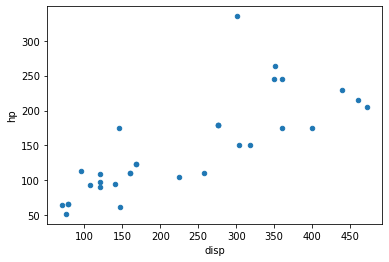

In [136]:
# scatter plot
mtcars_df.plot(kind = 'scatter', x = 'disp', y = 'hp')
plt.show()

<AxesSubplot:ylabel='Frequency'>

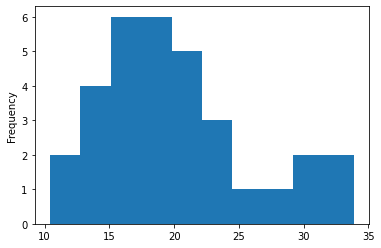

In [137]:
#histogram
mtcars_df["mpg"].plot(kind = 'hist', )

#### 3. String & Text

In [138]:
#a string is a sequence of characters.
message = "Have a wonderful day!"
print(message[0:5])

Have 


In [139]:
#number of characters in a string
len(message)

21

In [140]:
message.upper()

'HAVE A WONDERFUL DAY!'

In [141]:
# index of a substring
message.find("day")

17

In [142]:
#how many 'a' are there?
message.count('a')

3

In [143]:
# break into 3 parts 
message.partition(' ')

('Have', ' ', 'a wonderful day!')

In [144]:
# break into seperate words
message.rsplit(" ")

['Have', 'a', 'wonderful', 'day!']

In [145]:
#String formatting 
quantity = 3
itemno = 567
price = 49.95
myorder = "I want {} pieces of item {} for {} dollars."

In [146]:
# c-style printing
print("I want %d pieces of item %d for %.2f dollars." %(quantity, itemno, price))

I want 3 pieces of item 567 for 49.95 dollars.


In [147]:
# string formatting function
print(myorder.format(quantity, itemno, price))

I want 3 pieces of item 567 for 49.95 dollars.


In [148]:
# f-string
print(f'I want {quantity} pieces of item {itemno} for {price} dollars.')

I want 3 pieces of item 567 for 49.95 dollars.


In [149]:
# f-srting are fast and they are evaluated as expressions
list = [1, 2, 3, 4, 5]
print(f'The sum is: {sum(list)}')

The sum is: 15


#### 3.2 Regular expressions
- a package called re, which can be used to work with regular expressions
- Functions:
     - findall: Returns a list containing all matches
     - search : Returns a Match object if there is a match anywhere in the string
     - split: Returns a list where the string has been split at each match
     - sub: Replaces one or many matches with a string
     
- Character description
    - []	A set of characters		
    - \	Signals a special sequence	
    - .	Any character 	
    - ^	Starts with	
    - $	Ends with		
    - '*'	Zero or more occurrences
    - '+'	One or more occurrences		
    - ?	Zero or one occurrences		
    - {}	Exactly the specified number of occurrences	
    - |	Either or	
    - ()	Capture and group

In [150]:
import re

In [151]:
text = "It rained in Spain"
x = re.findall("ai", text)
print(x)

['ai', 'ai']


In [152]:
x = re.split("\s", text)        # \s -> white space character
print(x)

['It', 'rained', 'in', 'Spain']


In [153]:
# replacing parts of strings
str = 'aaa@gmail.com bbb@hotmail.com ccc@apple.com'
print(re.sub('[a-z]*@', 'info@', str))                         #anything before @ with info

info@gmail.com info@hotmail.com info@apple.com


In [154]:
str = 'aaa@gmail.com bbb@hotmail.com ccc@apple.com'
print(re.sub('gmail|hotmail|apple', 'accelerateai', str))

aaa@accelerateai.com bbb@accelerateai.com ccc@accelerateai.com


In [155]:
# searching for specific pattern - re.search() 
# it takes a regular expression pattern and a string and searches for that pattern within the string. 
# If the search is successful, search() returns a match object

str = 'purple alice-b@google.com monkey dishwasher'

match = re.search(r'([\w.-]+)@([\w.-]+)', str)
if match:
    print(match.group())   ## (the whole match)
    print(match.group(1))  ## (the username, group 1)
    print(match.group(2))  ## (the host, group 2)

alice-b@google.com
alice-b
google.com


In [156]:
## re.findall() returns a list of all the found email strings
str = 'purple alice@google.com, blah monkey bob@abc.com blah dishwasher'
emails = re.findall(r'[\w\.-]+@[\w\.-]+', str) 
for email in emails:
    print(email)

alice@google.com
bob@abc.com
